In [240]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt

In [241]:
# Import the healthcare dataset into a Pandas Dataframe
healthcare_df = pd.read_csv(Path("./Resources/healthcare-dataset-stroke-data.csv"))

# Review the DataFrame
healthcare_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [242]:
# Drop the ;id' column
healthcare_df = healthcare_df.drop(['id'],axis=1)

In [243]:
# Checking for null values
healthcare_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [244]:
# Determine mean value for BMI
healthcare_df['bmi'].mean()

28.893236911794666

In [245]:
# filling the Nan value in bmi colum with mean value 
healthcare_df = healthcare_df.fillna(healthcare_df['bmi'].mean())
healthcare_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [246]:
# Add a feature for the 'number of risks'
number_of_risks = []

for index, row in healthcare_df.iterrows():
    counter=0
    if row['avg_glucose_level'] >= 140:
        counter+=1
    if row['heart_disease']==1:
        counter+=1
    if row['hypertension']==1:
        counter+=1
    if row['smoking_status']=='smokes' or row['smoking_status']=='formerly smoked':
        counter+=1
    if row['bmi']>25:
        counter+=1
        
    number_of_risks.append(counter)

healthcare_df["number_of_risks"]= number_of_risks

healthcare_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,number_of_risks
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,4
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,2
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,2
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,3
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,2


In [247]:
#convert categorical data
#create encoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)

In [248]:
healthcare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
 11  number_of_risks    5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [249]:
list(healthcare_df.dtypes[healthcare_df.dtypes == "object"].index)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [250]:
# Create a list of the columns with categorical variables
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'number_of_risks']

# Use the fit_transform method from the OneHotEncoder to encode the data
encoded_data = enc.fit_transform(healthcare_df[categorical_variables])

In [251]:
 # Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names_out(categorical_variables)
)

# Display sample data
encoded_df.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,number_of_risks_0,number_of_risks_1,number_of_risks_2,number_of_risks_3,number_of_risks_4,number_of_risks_5
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [252]:
# Create a DataFrame with the columnns containing numerical variables from the original dataset
numerical_variables_df = healthcare_df.drop(columns = categorical_variables)

# Review the DataFrame
numerical_variables_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1


In [253]:
# Using the Pandas concat function, combine the DataFrames the contain the encoded categorical data and the numerical data
healthcare_encoded = pd.concat(
    [
        numerical_variables_df,
        encoded_df
    ],
    axis=1
)

healthcare_encoded.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,number_of_risks_0,number_of_risks_1,number_of_risks_2,number_of_risks_3,number_of_risks_4,number_of_risks_5
0,67.0,0,1,228.69,36.600000,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,61.0,0,0,202.21,28.893237,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,80.0,0,1,105.92,32.500000,1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,49.0,0,0,171.23,34.400000,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,79.0,1,0,174.12,24.000000,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [254]:
#Seperate Target
X = healthcare_encoded.drop(columns = "stroke")
y = healthcare_encoded["stroke"]

In [255]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [256]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


display(y_test.value_counts())

0    1203
1      75
Name: stroke, dtype: int64

In [257]:
# Import SMOTEENN from imblearn
from imblearn.combine import SMOTEENN

# Instantiate an instance of the SMOTEENN model
smote_enn = SMOTEENN(random_state=1)

# Fit the SMOTEENN model to the training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)


display(y_resampled.value_counts())

1    3522
0    3082
Name: stroke, dtype: int64

# Logistic Regression Model

In [258]:
# Declare a logistic regression model.
# Apply a random_state of 1 to the 
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(random_state=1)

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_resampled, y_resampled)

In [259]:
 #Generate training predictions
training_predictions = lr_model.predict(X_resampled)

#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)

In [260]:
from sklearn.metrics import confusion_matrix

# Create and save the confustion matrix for the training data
training_matrix = confusion_matrix(y_resampled, training_predictions)

# Print the confusion matrix for the training data
print(training_matrix)

[[2403  679]
 [ 444 3078]]


In [261]:
# Create and save the training classifiction report
from sklearn.metrics import classification_report
training_report = classification_report(y_resampled, training_predictions)
# Print the training classification report
print(training_report)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      3082
           1       0.82      0.87      0.85      3522

    accuracy                           0.83      6604
   macro avg       0.83      0.83      0.83      6604
weighted avg       0.83      0.83      0.83      6604



# Random Forest Classifier

In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Fit random forest on resampled data
model_RFC_resampled = RandomForestClassifier()
model_RFC_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [263]:
# Generate predictions based on the resampled data model
y_pred_RFC_resampled = model_RFC_resampled.predict(X_test)

In [264]:
# Print classification reports
print(classification_report(y_test, y_pred_RFC_resampled))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1203
           1       0.14      0.21      0.17        75

    accuracy                           0.88      1278
   macro avg       0.55      0.57      0.55      1278
weighted avg       0.90      0.88      0.89      1278



# Support Vector Machine Classifier

In [265]:
# Support vector machine linear classifier
from sklearn.svm import SVC

model_SVM_resampled = SVC(kernel='rbf') #'rbf' is the default (higher dimensions)
model_SVM_resampled.fit(X_resampled, y_resampled)

SVC()

In [266]:
# Generate predictions based on the resampled data model
y_pred_SVM_resampled = model_SVM_resampled.predict(X_test)

In [267]:
# Print classification reports
print(classification_report(y_test, y_pred_SVM_resampled))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1203
           1       0.11      0.45      0.18        75

    accuracy                           0.76      1278
   macro avg       0.54      0.62      0.52      1278
weighted avg       0.91      0.76      0.82      1278



# Decision Tree Classifier

In [268]:
from sklearn import tree

# Creating the decision tree classifier instance
model_DTC_resampled = tree.DecisionTreeClassifier(random_state = 1)
model_DTC_resampled = model_DTC_resampled.fit(X_resampled, y_resampled)

In [269]:
# Making predictions using the testing data
y_pred_DTC_resampled = model_DTC_resampled.predict(X_test)

In [270]:
# Displaying classification report
print(classification_report(y_test, y_pred_DTC_resampled))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1203
           1       0.11      0.21      0.14        75

    accuracy                           0.85      1278
   macro avg       0.53      0.55      0.53      1278
weighted avg       0.90      0.85      0.87      1278



# KNN Classifier

In [271]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN_resampled = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
model_KNN_resampled = model_KNN_resampled.fit(X_resampled, y_resampled)

In [272]:
y_pred_KNN_resampled = model_KNN_resampled.predict(X_test)

In [273]:
print(classification_report(y_test, y_pred_KNN_resampled))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1203
           1       0.10      0.33      0.16        75

    accuracy                           0.79      1278
   macro avg       0.53      0.57      0.52      1278
weighted avg       0.90      0.79      0.84      1278



# Stacking Classifier

In [274]:
from sklearn.ensemble import StackingClassifier
models= [("DecisionTree",model_DTC_resampled), ("SupportVector", model_SVM_resampled), ("RandomForest",model_RFC_resampled), ("KNN",model_KNN_resampled)]
stc_clf= StackingClassifier(estimators=models, final_estimator= lr_model, cv = 10)
stc_clf.fit(X_resampled, y_resampled)



StackingClassifier(cv=10,
                   estimators=[('DecisionTree',
                                DecisionTreeClassifier(random_state=1)),
                               ('SupportVector', SVC()),
                               ('RandomForest', RandomForestClassifier()),
                               ('KNN', KNeighborsClassifier())],
                   final_estimator=LogisticRegression(random_state=1))

In [275]:
y_pred_stc_clf = stc_clf.predict(X_test)

print(classification_report(y_test, y_pred_stc_clf))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1203
           1       0.11      0.21      0.15        75

    accuracy                           0.86      1278
   macro avg       0.53      0.55      0.53      1278
weighted avg       0.90      0.86      0.88      1278



# Try a Neural Network

In [276]:
#Import tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [277]:
 # Define the the number of inputs (features) to the model
number_input_features = X_resampled.shape[1]

# Define the number of hidden nodes for the first hidden layer
# Use the mean of the number of input features plus the number of output nurons
# Use the Python floor division (//) to return the quotent
hidden_nodes_layer1 =  (number_input_features + 1) // 2 

# Define the number of hidden nodes for the second hidden layer
# Use the mean of the number of hidden nodes in the first hidden layer plus the number of output nurons
# Use the Python floor division (//) to return the quotent
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2

# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=1, activation="sigmoid"))

In [278]:
 # Display the Sequential model summary
nn.summary() 

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 14)                392       
                                                                 
 dense_35 (Dense)            (None, 7)                 105       
                                                                 
 dense_36 (Dense)            (None, 1)                 8         
                                                                 
Total params: 505 (1.97 KB)
Trainable params: 505 (1.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [279]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy",
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall")
    ]
)

In [280]:
# Fit the model using 100 epochs and the training data
fit_model = nn.fit(X_resampled, y_resampled, epochs=100)

Epoch 1/100
207/207 [==============================] - 2s 2ms/step - loss: 0.5550 - accuracy: 0.7233 - precision: 0.7012 - recall: 0.8387
Epoch 2/100
207/207 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.8157 - precision: 0.8002 - recall: 0.8722
Epoch 3/100
207/207 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8380 - precision: 0.8216 - recall: 0.8893
Epoch 4/100
207/207 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8493 - precision: 0.8296 - recall: 0.9029
Epoch 5/100
207/207 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8536 - precision: 0.8335 - recall: 0.9066
Epoch 6/100
207/207 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8592 - precision: 0.8377 - recall: 0.9128
Epoch 7/100
207/207 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8655 - precision: 0.8442 - recall: 0.9171
Epoch 8/100
207/207 [=============

In [281]:
 # Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy, model_precision, model_recall = nn.evaluate(X_test,y_test,verbose=4)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy} Precision: {model_precision}. Recall: {model_recall}")

Loss: 1.0551592111587524, Accuracy: 0.7910798192024231 Precision: 0.11599999666213989. Recall: 0.3866666555404663


In [438]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [439]:
from keras.layers import Dropout
# Import regularizers
from keras.regularizers import l1, l2

In [508]:
number_input_features = X_resampled.shape[1]

# Define the number of hidden nodes for the first hidden layer
# Use the mean of the number of input features plus the number of output nurons
# Use the Python floor division (//) to return the quotent
hidden_nodes_layer1 = 12

# Define the number of hidden nodes for the second hidden layer
# Use the mean of the number of hidden nodes in the first hidden layer plus the number of output nurons
# Use the Python floor division (//) to return the quotent
hidden_nodes_layer2 = 6

# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer specifying the number of inputs, the number of hidden nodes, and the activation function
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))




# Add the second hidden layer specifying the number of hidden nodes and the activation function
nn.add(Dense(units=hidden_nodes_layer2, activation='relu'))


# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=1, activation="sigmoid"))

In [509]:
nn.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [505]:
nn.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 10)                280       
                                                                 
 dense_86 (Dense)            (None, 5)                 55        
                                                                 
 dense_87 (Dense)            (None, 1)                 6         
                                                                 
Total params: 341 (1.33 KB)
Trainable params: 341 (1.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [510]:
# Add in validation loss to select the number of epochs
# Fit the model
batch_size = 300
epochs = 100
training_history = nn.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/100
13/13 [==============================] - 2s 43ms/step - loss: 0.7554 - accuracy: 0.4763 - tp: 55.0000 - tn: 1770.0000 - fp: 1888.0000 - fn: 119.0000 - precision: 0.0283 - recall: 0.3161 - auc: 0.3880 - val_loss: 0.6920 - val_accuracy: 0.5790 - val_tp: 25.0000 - val_tn: 715.0000 - val_fp: 488.0000 - val_fn: 50.0000 - val_precision: 0.0487 - val_recall: 0.3333 - val_auc: 0.4676
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.6463 - accuracy: 0.6521 - tp: 36.0000 - tn: 2463.0000 - fp: 1195.0000 - fn: 138.0000 - precision: 0.0292 - recall: 0.2069 - auc: 0.4103 - val_loss: 0.6063 - val_accuracy: 0.7183 - val_tp: 15.0000 - val_tn: 903.0000 - val_fp: 300.0000 - val_fn: 60.0000 - val_precision: 0.0476 - val_recall: 0.2000 - val_auc: 0.4645
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 0.5668 - accuracy: 0.7860 - tp: 13.0000 - tn: 2999.0000 - fp: 659.0000 - fn: 161.0000 - precision: 0.0193 - recall: 0.0747 - auc: 0.4168 - val_los

In [511]:
display(y_test.value_counts())

0    1203
1      75
Name: stroke, dtype: int64

In [512]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

# Predict classes using testing data
y_predict_classes = (nn.predict(X_test) > 0.2).astype("int32")

# Display classification report
print(classification_report(y_predict_classes, y_test))

40/40 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1223
           1       0.09      0.13      0.11        55

    accuracy                           0.91      1278
   macro avg       0.53      0.54      0.53      1278
weighted avg       0.92      0.91      0.92      1278



<Axes: title={'center': 'Loss'}, xlabel='Epoch'>

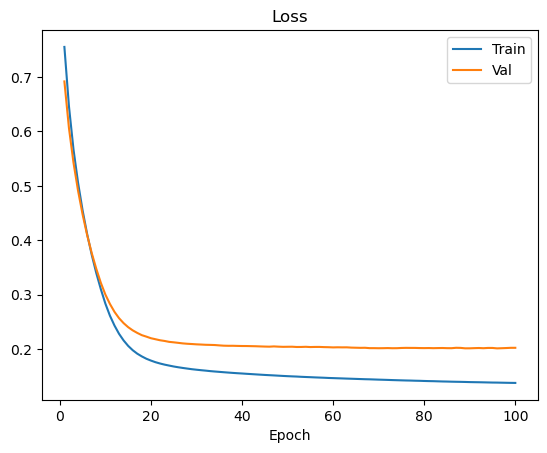

In [513]:
loss_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["loss"],
        "Val": training_history.history["val_loss"],
    }
)
loss_df.set_index("Epoch", inplace=True)
loss_df.plot(title="Loss")

<Axes: title={'center': 'Accuracy'}, xlabel='Epoch'>

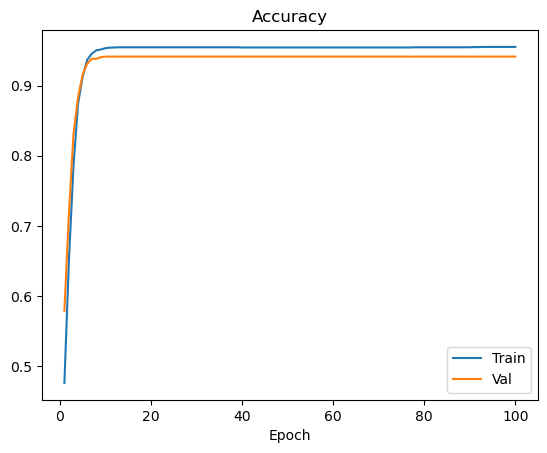

In [514]:
# Plotting accuracy
accuracy_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["accuracy"],
        "Val": training_history.history["val_accuracy"],
    }
)
accuracy_df.set_index("Epoch", inplace=True)
accuracy_df.plot(title="Accuracy")

<Axes: title={'center': 'AUC'}, xlabel='Epoch'>

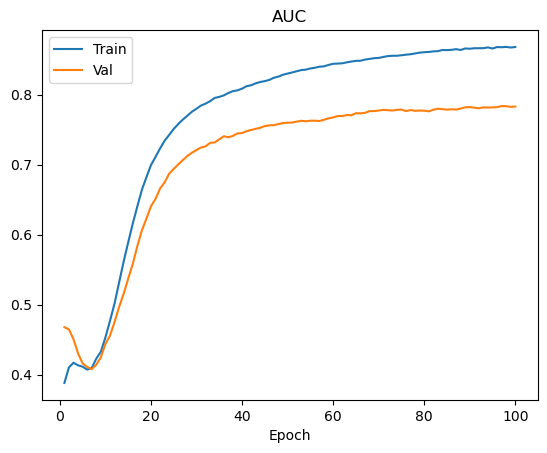

In [515]:
# Plotting AUC
auc_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": training_history.history["auc"],
        "Val": training_history.history["val_auc"],
    }
)
auc_df.set_index("Epoch", inplace=True)
auc_df.plot(title="AUC")

In [516]:
# Import the roc_curve and auc metrics from sklearn
from sklearn.metrics import roc_curve, auc

In [517]:
# Making predictions to feed the roc_curve module
train_predictions = nn.predict(X_train, batch_size=50)
test_predictions = nn.predict(X_test, batch_size=50)

26/26 [==============================] - 0s 1ms/step


In [518]:
# Calculate the ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_predictions)
auc_train = auc(fpr_train, tpr_train)
auc_train = round(auc_train, 4)

# Calculate the ROC curve and AUC for the testing set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_predictions)
auc_test = auc(fpr_test, tpr_test)
auc_test = round(auc_test, 4)

In [519]:
# Create a DataFrame with the fpr and tpr results
roc_df_train = pd.DataFrame({"FPR Train": fpr_train, "TPR Train": tpr_train,})

roc_df_test = pd.DataFrame({"FPR Test": fpr_test, "TPR Test": tpr_test,})

<Axes: title={'center': 'Test ROC Curve (AUC=0.7828)'}, xlabel='FPR Test'>

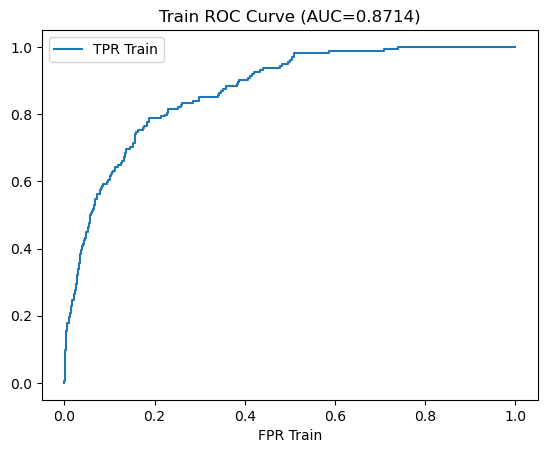

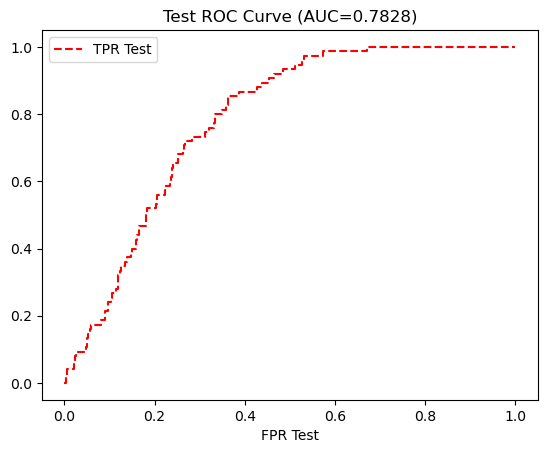

In [520]:
# Plotting the ROC Curves
roc_df_train.plot(
    x="FPR Train",
    y="TPR Train",
    xlim=([-0.05, 1.05]),
    title=f"Train ROC Curve (AUC={auc_train})",
)

roc_df_test.plot(
    x="FPR Test",
    y="TPR Test",
    color="red",
    style="--",
    xlim=([-0.05, 1.05]),
    title=f"Test ROC Curve (AUC={auc_test})",
)

In [521]:
# Evaluate the model
scores = nn.evaluate(X_test, y_test, verbose=0)

# Define metrics dictionary
metrics = {k: v for k, v in zip(nn.metrics_names, scores)}

# Display evaluation metrics results
display(metrics)

{'loss': 0.20225973427295685,
 'accuracy': 0.9413145780563354,
 'tp': 0.0,
 'tn': 1203.0,
 'fp': 0.0,
 'fn': 75.0,
 'precision': 0.0,
 'recall': 0.0,
 'auc': 0.7828651070594788}